In [4]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import nltk

In [5]:
df=pd.read_csv("train_comments.csv")

df.head()

author                                               body                                          body_html  controversiality     created  created_utc distinguished downs        edited gilded       id likes    link_id        name num_reports  parent_id                                            replies score subreddit   ups     pid                                             tokens  comment_length  n_tokens                                           keywords
0           SirT6  The title sort of misses the point of the stud...  &lt;div class="md"&gt;&lt;p&gt;The title sort ...                 0  1447279564   1447250764           NaN     0         False      1  cwwhtv7   NaN  t3_3se6lu  t1_cwwhtv7         NaN  t3_3se6lu  {u'kind': u'Listing', u'data': {u'modhash': No...  1359   science  1359  3se6lu  Counter({'alga': 5, 'cancer': 4, 'cell': 4, 'd...             869        52  {'toxinalgae': 1.009933774834437, 'cancer': 1....
1  DrBiochemistry  Just want to point out that until I see a deli...  &lt;div class="md"&gt;&lt;p&gt;Just want to po...                 0  1447277409   1447248609           NaN     0         False      0  cwwgxle   NaN  t3_3se6lu  t1_cwwgxle         NaN  t3_3se6lu  {u'kind': u'Listing', u'data': {u'modhash': No...  3209   science  3209  3se6lu  Counter({'kill': 2, 'deliveri': 2, 'cancer': 1...             307        30  {'delivery': 1.0588235294117647, 'survives': 1...
2       Frogblood  It's an interesting idea but the in vitro and ...  &lt;div class="md"&gt;&lt;p&gt;It&amp;#39;s an...                 0  1447276156   1447247356           NaN     0         False      0  cwwggxu   NaN  t3_3se6lu  t1_cwwggxu         NaN  t3_3se6lu  {u'kind': u'Listing', u'data': {u'modhash': No...   133   science   133  3se6lu  Counter({'idea': 2, 'target': 2, 'overexcit': ...             432        39  {'tumour': 1.0217391304347827, 'targeting': 1....
3       mijn_ikke  Just waiting until somebody smarter than me co...  &lt;div class="md"&gt;&lt;p&gt;Just waiting un...                 0  1447275611   1447246811           NaN     0  1447248944.0      1  cwwga6g   NaN  t3_3se6lu  t1_cwwga6g         NaN  t3_3se6lu  {u'kind': u'Listing', u'data': {u'modhash': No...   773   science   773  3se6lu  Counter({'thank': 1, 'gold': 1, 'point': 1, 'e...             163        12  {'somebody': 1.0517241379310345, 'gold': 1.051...
4         awhitt8  Yes the title is sensationalized.\n\n&gt;The m...  &lt;div class="md"&gt;&lt;p&gt;Yes the title i...                 0  1447284967   1447256167           NaN     0  1447259263.0      0  cwwkopn   NaN  t3_3se6lu  t1_cwwkopn         NaN  t3_3se6lu  {u'kind': u'Listing', u'data': {u'modhash': No...    16   science    16  3se6lu  Counter({'drug': 5, 'deliveri': 4, 'materi': 3...            1447       104  {'delivery': 1.030612244897959, 'title': 1.015...

In [6]:
from nltk.tokenize import RegexpTokenizer
stopWords = nltk.corpus.stopwords.words('english') + ['.',',']
def tokenize(body):
    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(unicode(str(body),"utf-8"))
    return [e.lower() for e in words if not e.lower() in stopWords]

In [7]:
df['token_body'] = df.body.apply(tokenize)

In [8]:
def tokensentence(token_body):
    return ' '.join(word for word in token_body)

In [9]:
df['token_sentence'] = df.token_body.apply(tokensentence)

# We will be creating various corpuses for the various wordcloud visalization we will be using


In [11]:
subreddit = ['science', 'news', 'worldnews', 'dataisbeutiful', 'todayilearned', 'politics', 'technology', 'space', 'InternetIsBeautiful',
             'nottheonion', 'gadgets', 'Documentaries', 'UpliftingNews', 'programming', 'europe', 'datascience', 'uspolitics', 'ukpolitics',
             'CanadaPolitics', 'Liberal', 'Conservative' , 'nba', 'soccer', 'nfl' , 'food', 'SubredditSimulator']

### Create a list of corpus that has subreddits

In [18]:
for sub in subreddit:
    corpus = df[df.subreddit == sub].body
    file = open(sub + ".txt", "w") 
    for i in corpus:
        file.write(str(i) + '\n')
    file.close()

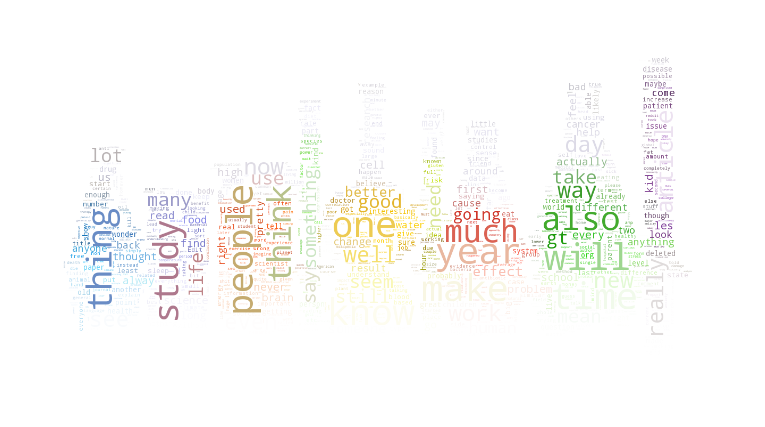

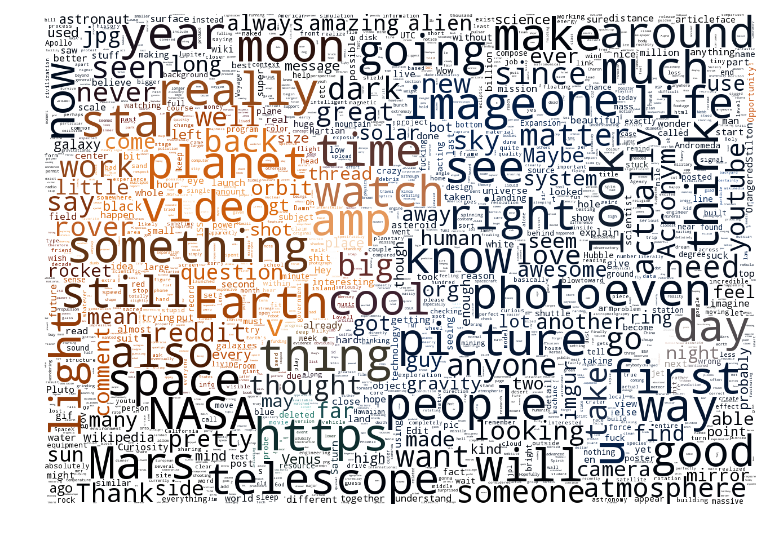

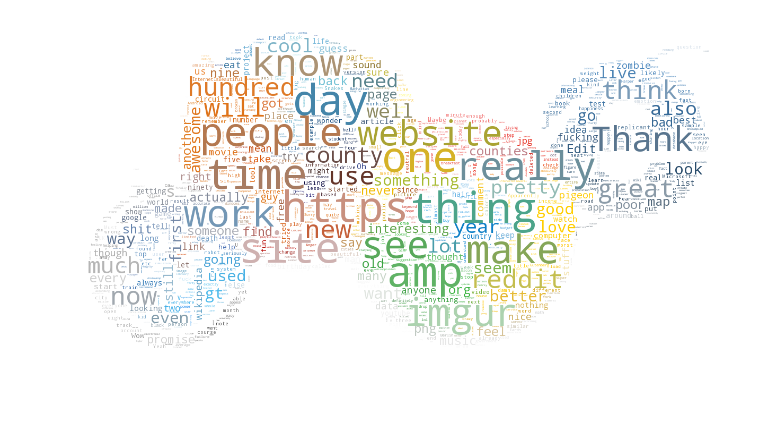

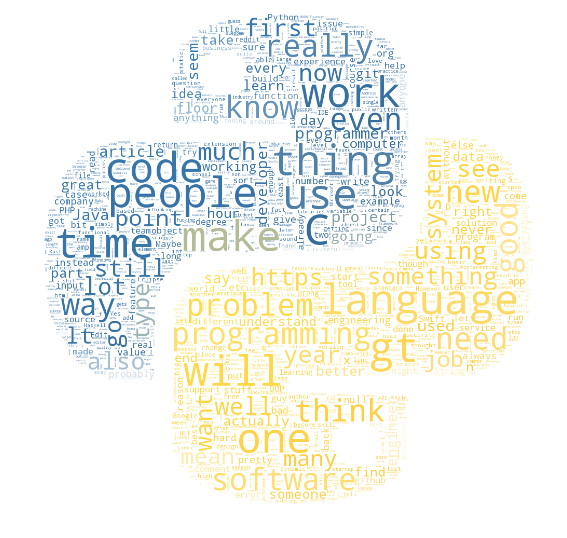

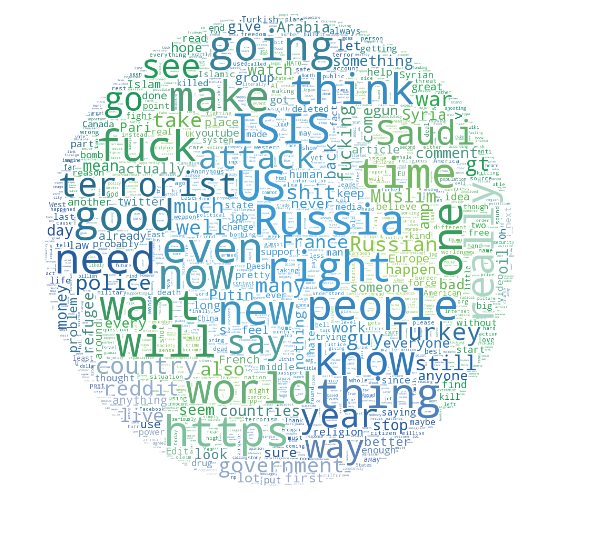

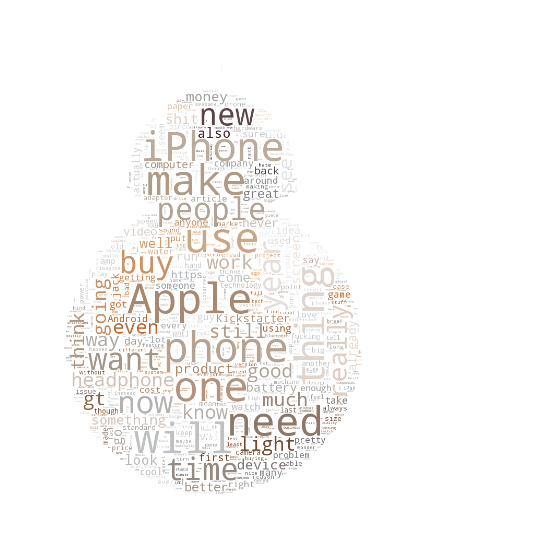

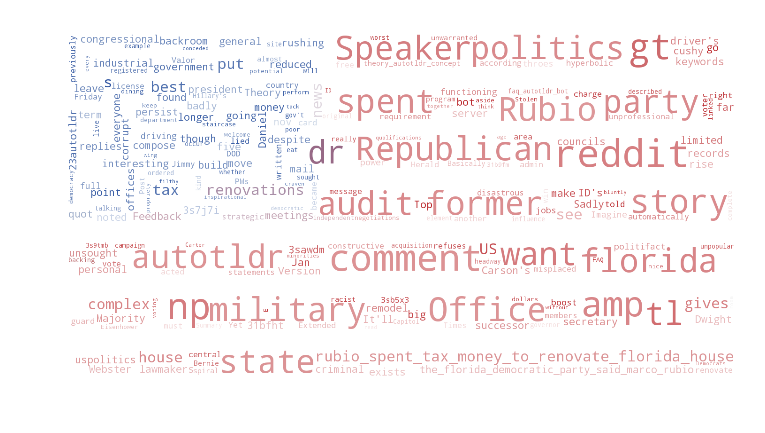

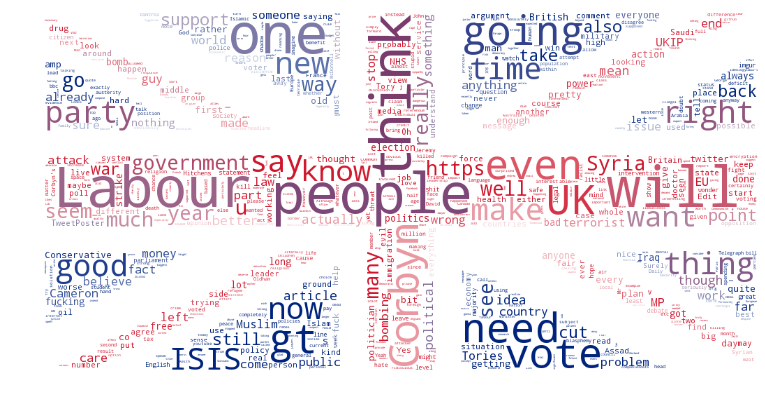

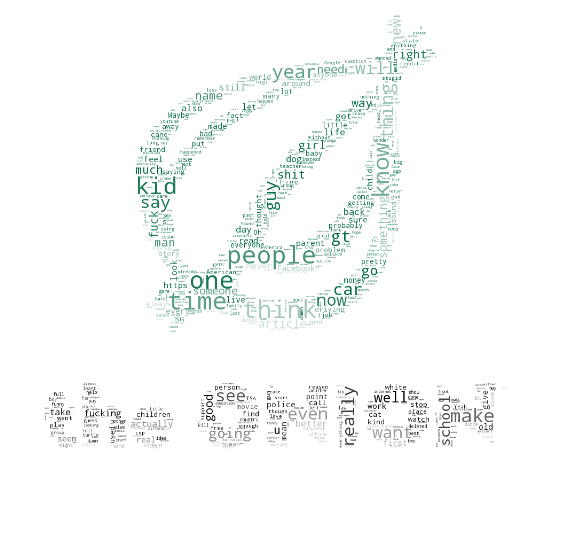

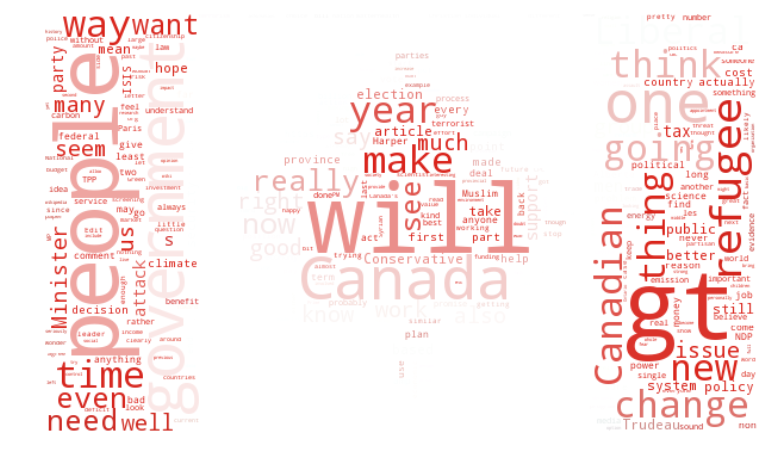

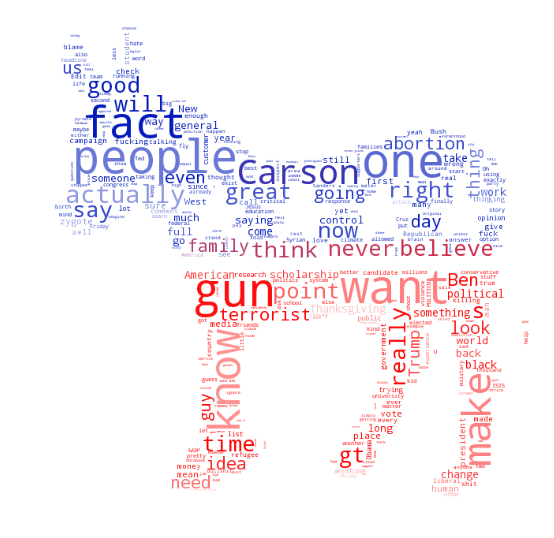

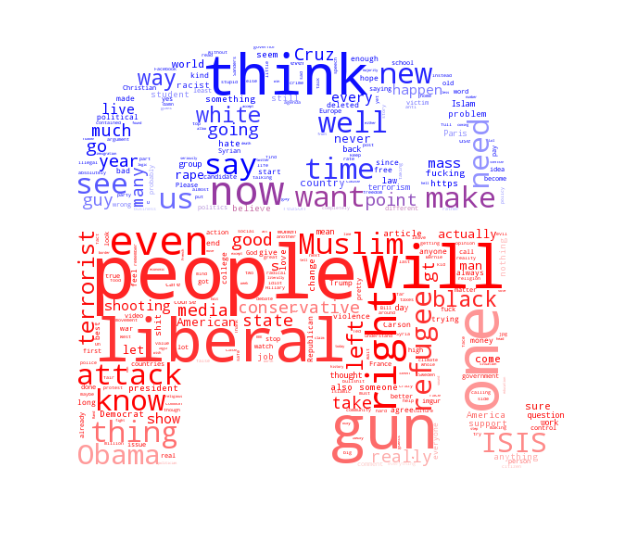

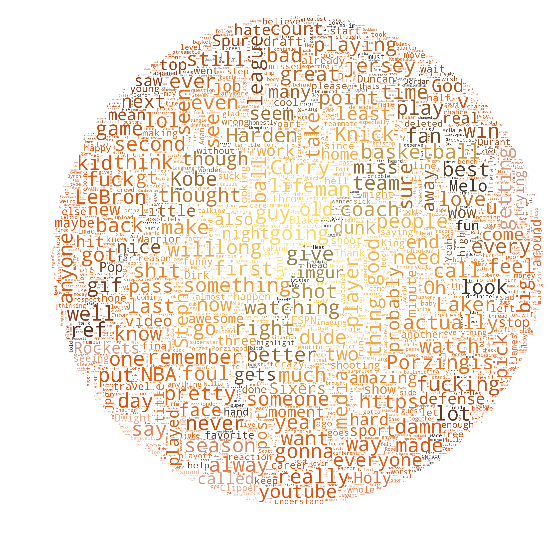

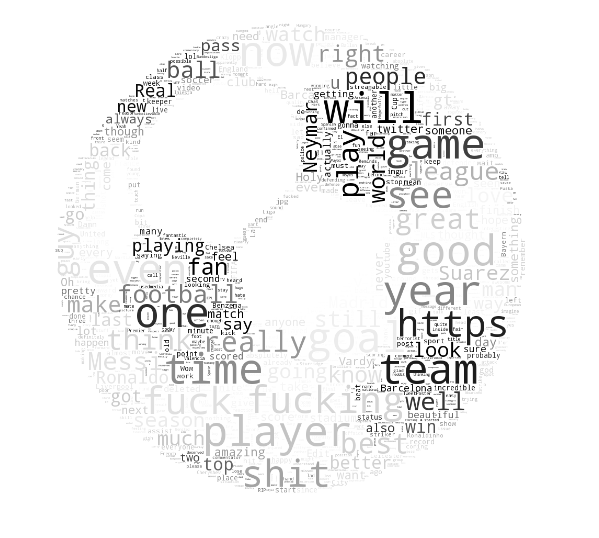

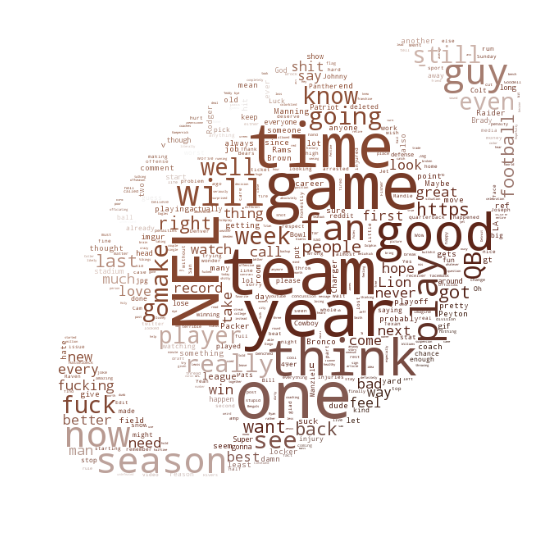

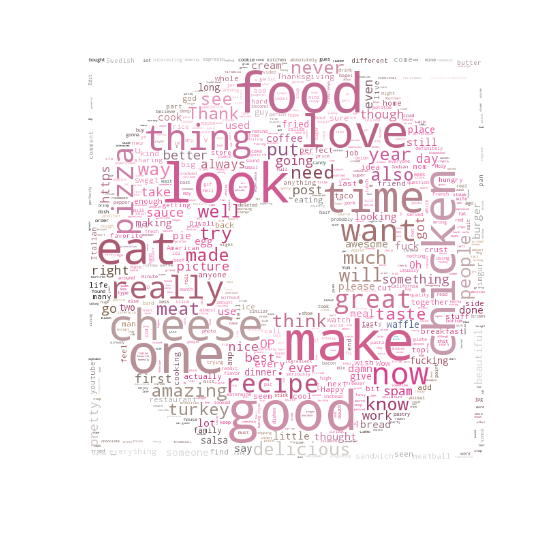

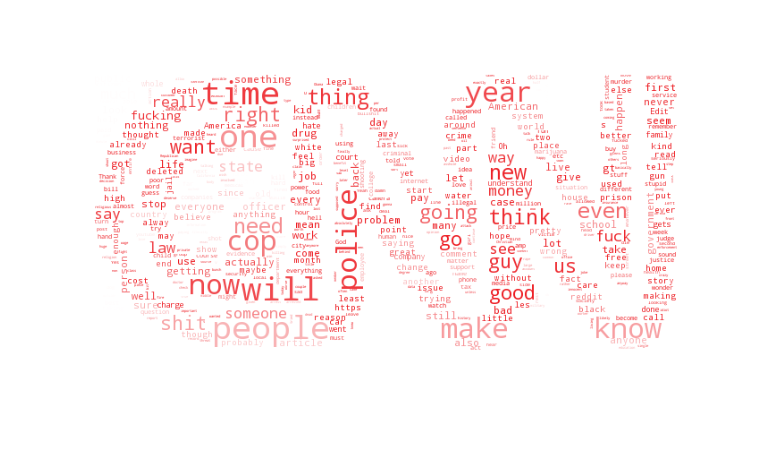

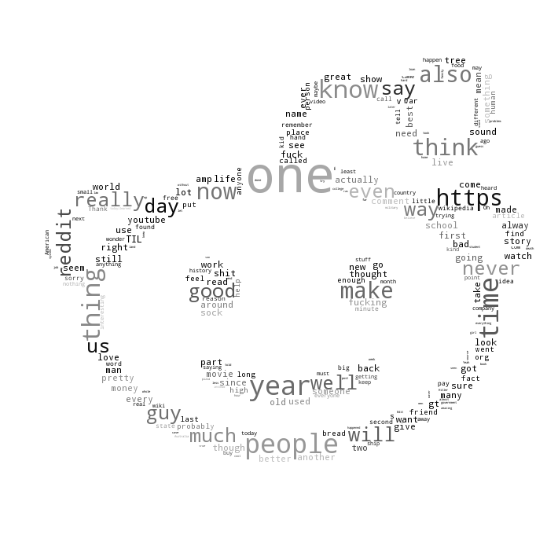

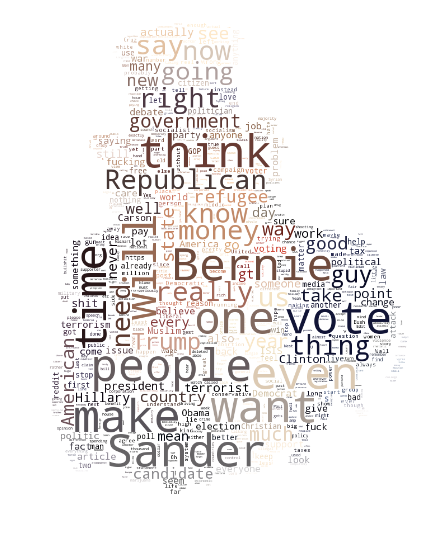

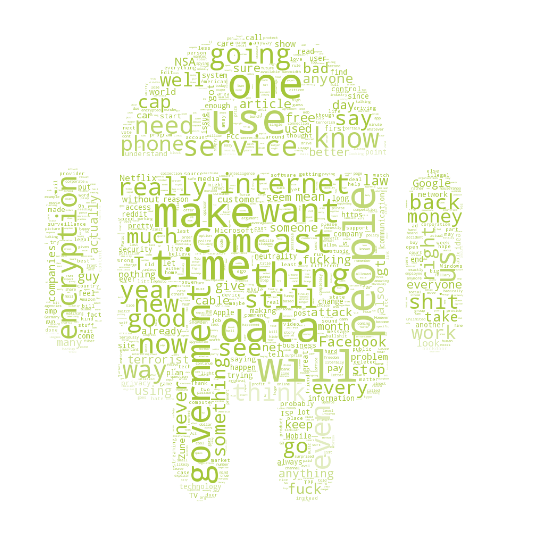

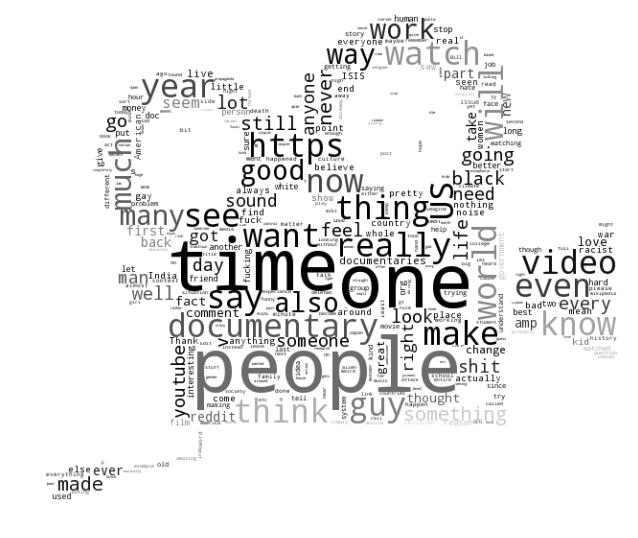

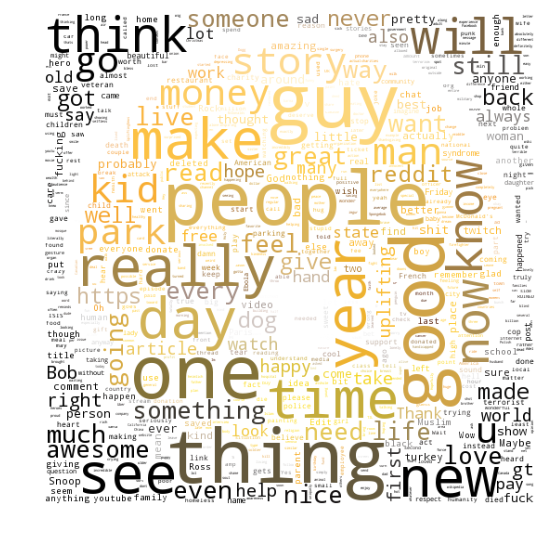

In [58]:
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

d = path.dirname('__file__')

for sub in subreddit:
    text = open(path.join(d, sub + '.txt')).read()
    reddit_mask = imread(path.join(d, sub + ".png"))
    wc = WordCloud(background_color="white", max_words=2000, mask = reddit_mask , max_font_size=80,)
    # generate word cloud
    wc.generate(text)
    # create coloring from image
    image_colors = ImageColorGenerator(reddit_mask)
    #recolor using the image colors 
    plt.imshow(wc.recolor(color_func=image_colors))
    plt.axis("off")
    plt.figure()
    # store to file
    wc.to_file(path.join(d, sub + " wordcloud" + ".png"))
  
